# Problem Statement : 

- Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

# Data Dictionary:

### RATINGS FILE DESCRIPTION

- All ratings are contained in the file "ratings.dat" and are in the following format:

      - UserID::MovieID::Rating::Timestamp

      - UserIDs range between 1 and 6040

      - MovieIDs range between 1 and 3952

      - Ratings are made on a 5-star scale (whole-star ratings only)

      - Timestamp is represented in seconds

      - Each user has at least 20 ratings


### USERS FILE DESCRIPTION

- User information is in the file "users.dat" and is in the following format:

    - UserID::Gender::Age::Occupation::Zip-code

- All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female

      Age is chosen from the following ranges:

      1: "Under 18"
      18: "18-24"
      25: "25-34"
      35: "35-44"
      45: "45-49"
      50: "50-55"
      56: "56+"

- Occupation is chosen from the following choices:

      0: "other" or not specified
      1: "academic/educator"
      2: "artist"
      3: "clerical/admin"
      4: "college/grad student"
      5: "customer service"
      6: "doctor/health care"
      7: "executive/managerial"
      8: "farmer"
      9: "homemaker"
      10: "K-12 student"
      11: "lawyer"
      12: "programmer"
      13: "retired"
      14: "sales/marketing"
      15: "scientist"
      16: "self-employed"
      17: "technician/engineer"
      18: "tradesman/craftsman"
      19: "unemployed"
      20: "writer"

### MOVIES FILE DESCRIPTION

- Movie information is in the file "movies.dat" and is in the following format:

     - MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)

      - Genres are pipe-separated and are selected from the following genres:

      Action
      Adventure
      Animation
      Children's
      Comedy
      Crime
      Documentary
      Drama
      Fantasy
      Film-Noir
      Horror
      Musical
      Mystery
      Romance
      Sci-Fi
      Thriller
      War
      Western


##  Concepts Tested:
- Recommender Engine
- Collaborative Filtering (Item-based & User-based Approach)
- Pearson Correlation

- Nearest Neighbors using Cosine Similarity
- Matrix Factorization

## Required to do : 

- Reading the data files, formatting them into a proper workable format and merging the data files into one single dataframe


- Performing exploratory data analysis like checking the structure & characteristics of the dataset and cleaning the data

- Performing feature engineering steps type conversions and deriving new features like ‘Release Year’

- Visualizing the data with respect to different categories to get a better understanding of the underlying distribution

- Grouping the data in terms of Average Rating and No. of Ratings given

- Creating a pivot table of movie titles & user id and imputing the NaN values with a suitable value

- Follow the Item-based approach and Pearson Correlation

- Take a movie name as input from the user Recommend 5 similar movies based on Pearson Correlation

- Cosine Similarity

- Print the item similarity matrix and user similarity matrix

- Example: An user-user similarity matrix just for demonstration.

- Create a CSR matrix using the pivot table.[Optional, This is an extended approach, link to example implementation].

- Write a function to return top 5 recommendations for a given item

- [sklearn optional] Take a movie name as user input and use KNN algorithm to recommend 5 similar movies based on Cosine Similarity. [link to sklearn Nearest Neighbor documentation]


- Matrix Factorization

- Use cmfrec/Surprise library to run matrix factorization. (Show results with d=4).

- Evaluate the model’s performance using RMSE and MAPE.

- Bonus - how can you do a train test split for MF?

- Embeddings for item-item and user-user similarity

- Re-design the item-item similarity function to use MF embeddings (d=4) instead of raw features

- Similarly, do this for user-user similarity

- Bonus: Get d=2 embeddings, and plot the results. Write down your analysis from this visualisation. (Compare with other visualization techniques)

- Follow the User-based approach (Optional)

- Ask the user to rate a few movies and create a dataframe of the user’s choices.

- Find other users who’ve watched the same movies as the new user.

- Sort the old users by the count of most movies in common with the new user.

- Take the top 100 users and calculate a Similarity Score for each user using the Pearson Correlation function.

- Get the top 10 users with the highest similarity indices, all the movies for these users, and add Weighted movie Ratings by Multiplying the Rating to the Similarity Index.

- Calculate the average recommendation score by dividing the Weighted Rating by the Similarity Index and select movies with the highest score i.e., 5.

- Now, recommend 10 movies based on the ratings given by old users who are similar to the new user.


### Questionnaire:

- Users of which age group have watched and rated the most number of movies?

- Users belonging to which profession have watched and rated the most movies?

- Most of the users in our dataset who’ve rated the movies are Male. (T/F)

- Most of the movies present in our dataset were released in which decade?

- 70s b. 90s c. 50s d.80s

- The movie with maximum no. of ratings is ___.

- Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

- On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

- Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

- Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

- Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

# New Section

In [9]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
movies = pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-movies.dat",encoding="ISO-8859-1")
ratings =pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-ratings.dat",encoding="ISO-8859-1")
users = pd.read_fwf("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /zee-users.dat",encoding="ISO-8859-1")

In [11]:
delimiter ="::"

users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimiter,expand = True)
users.columns = ["UserID","Gender","Age","Occupation","Zipcode"]

users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34",
                          "35": "35-44","45": "45-49","50": "50-55","56": "56+"},inplace=True)

users["Occupation"] = users["Occupation"].astype(int).replace({0: "other",1: "academic/educator",2: "artist",
                                                               3: "clerical/admin",4: "college/grad student",
                                             5: "customer service",6: "doctor/health care",7: "executive/managerial",
                                             8: "farmer" ,9: "homemaker",10: "K-12 student",11: "lawyer",
                                             12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",
                                             16: "self-employed",17: "technician/engineer",
                                             18: "tradesman/craftsman",19: "unemployed",20: "writer"},
                                            )

delimiter ="::"

ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimiter,expand = True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]


movies.drop(["Unnamed: 1","Unnamed: 2"],axis = 1,inplace=True)



delimiter ="::"

movies = movies["Movie ID::Title::Genres"].str.split(delimiter,expand = True)
movies.columns = ["MovieID","Title","Genres"]


movies.shape,ratings.shape,users.shape


((3883, 3), (1000209, 4), (6040, 5))

In [12]:
movies["Release_year"] = movies["Title"].str.extract('^(.+)\s\(([0-9]*)\)$',expand = True)[1]
movies["Title"] = movies["Title"].str.split("(").apply(lambda x:x[0])

In [13]:
from datetime import datetime
ratings["Watch_Hour"] =ratings["Timestamp"].apply(lambda x:datetime.fromtimestamp(int(x)).hour)
ratings.drop(["Timestamp"],axis = 1,inplace=True)

In [14]:
movies.shape,ratings.shape,users.shape


((3883, 4), (1000209, 4), (6040, 5))

In [8]:
df = users.merge(movies.merge(ratings,on="MovieID",how="outer"),on="UserID",how="outer")

In [9]:
(df.isna().sum())/len(df)  * 100

UserID          0.017693
Gender          0.017693
Age             0.017693
Occupation      0.017693
Zipcode         0.017693
MovieID         0.000000
Title           0.000000
Genres          0.406443
Release_year    0.377854
Rating          0.017693
Watch_Hour      0.017693
dtype: float64

In [10]:
data = df.copy()
data.dropna(inplace= True)

In [11]:
data

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Release_year,Rating,Watch_Hour
0,1,F,Under 18,K-12 student,48067,1,Toy Story,Animation|Children's|Comedy,1995,5,23.0
1,1,F,Under 18,K-12 student,48067,48,Pocahontas,Animation|Children's|Musical|Romance,1995,5,23.0
2,1,F,Under 18,K-12 student,48067,150,Apollo 13,Drama,1995,5,22.0
3,1,F,Under 18,K-12 student,48067,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantas,1977,4,22.0
4,1,F,Under 18,K-12 student,48067,527,Schindler's List,Drama|War,1993,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25-34,doctor/health care,11106,3683,Blood Simple,Drama|Film-Noir,1984,4,8.0
1000205,6040,M,25-34,doctor/health care,11106,3703,Mad Max 2,Action|Sci-Fi,1981,4,23.0
1000206,6040,M,25-34,doctor/health care,11106,3735,Serpico,Crime|Drama,1973,4,8.0
1000207,6040,M,25-34,doctor/health care,11106,3751,Chicken Run,Animation|Children's|Comedy,2000,4,23.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996144 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        996144 non-null  object 
 1   Gender        996144 non-null  object 
 2   Age           996144 non-null  object 
 3   Occupation    996144 non-null  object 
 4   Zipcode       996144 non-null  object 
 5   MovieID       996144 non-null  object 
 6   Title         996144 non-null  object 
 7   Genres        996144 non-null  object 
 8   Release_year  996144 non-null  object 
 9   Rating        996144 non-null  object 
 10  Watch_Hour    996144 non-null  float64
dtypes: float64(1), object(10)
memory usage: 91.2+ MB


In [13]:
data.nunique()

UserID          6040
Gender             2
Age                7
Occupation        21
Zipcode         3439
MovieID         3682
Title           3633
Genres           358
Release_year      81
Rating             5
Watch_Hour        24
dtype: int64

In [14]:
# 6040 unique UserID
# 7 different age groups
# 21 occupations
# 3493 different locations of users
# 3682 unique movies 


In [15]:
# There are movies available in database , which were never been watched by any user before . 
# Thats is the reason we have lots of NaN values in our final dataset. 

In [16]:
data.shape

(996144, 11)

In [17]:
m = movies[["MovieID","Title","Genres"]]


In [18]:
m["Genres"] = m["Genres"].str.split("|")

In [19]:

m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"Horro":"Horror",
                     "Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                     "Dr":"Drama",
                     "Documenta":"Documentary",
                     "Wester":"Western",
                     "Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance",
                     "Animati":"Animation",
                     "Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                     "Roma":"Romance","A":"Adventure","Children":"Children's",
                     "Adventu":"Adventure",
                      "Adv":"Adventure",
                      "Wa":"War",
                      "Thrille"  :"Thriller"     ,
                      "Com"        :"Comedy"   ,
                      "Comed"         :"Comedy",
                      "Acti"          :"Action",
                        "Advent"        :"Adventure",
                        "Adventur"      :"Adventure",
                        "Thri":"Thriller",          
                        "Chi":"Children's",           
                        "Ro":"Romance",            
                        "F":"Fantasy",             
                        "We":"Western",            
                        "Documen":"Documentary"       ,
                        "Music":"Musical"         ,
                        "Children":"Children's" ,    
                        "Horr":"Horror"          ,
                     "Children'":"Children's",
                     "Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                     })

In [20]:
m

,MovieID,Title,Genres
0,1,Toy Story,Animation
0,1,Toy Story,Children's
0,1,Toy Story,Comedy
1,2,Jumanji,Adventure
1,2,Jumanji,Children's
...,...,...,...
3879,3949,Requiem for a Dream,Drama
3880,3950,Tigerland,Drama
3881,3951,Two Family House,Drama
3882,3952,"Contender, The",Drama


In [21]:

m = pd.crosstab(m["MovieID"],       m["Genres"])  
m = pd.DataFrame(np.where(m>=1,1,0),index = m.index,columns=m.columns)

In [22]:
m

Genres,,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
996,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
final_data = data.merge(m,on="MovieID",how="left").drop(["Genres"],axis = 1)

In [36]:
path = '/content/drive/Othercomputers/My Laptop/Data Science Studies/final_data.csv '

In [37]:
final_data.to_csv(path)

## Most of the movies present in our dataset were released in which decade?


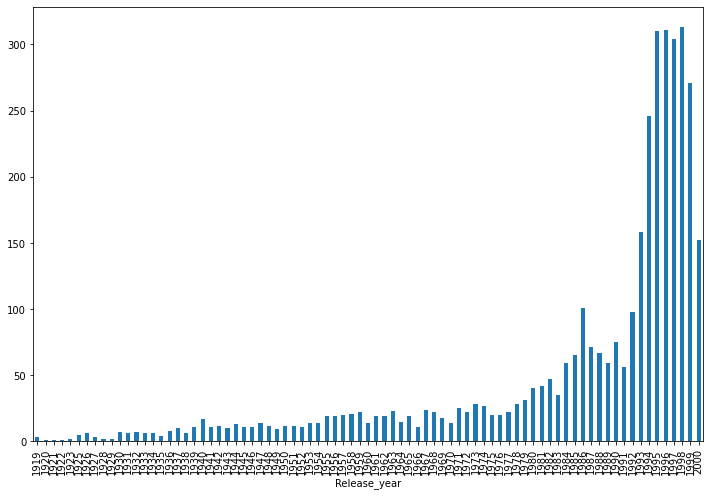

In [48]:
final_data.groupby("Release_year")["Title"].nunique().plot(kind="bar")

## Users of which age group have watched and rated the most number of movies?



In [49]:
final_data.groupby("Age")["Title"].nunique()

Age
18-24       3326
25-34       3439
35-44       3381
45-49       3221
50-55       3200
56+         2857
Under 18    2592
Name: Title, dtype: int64

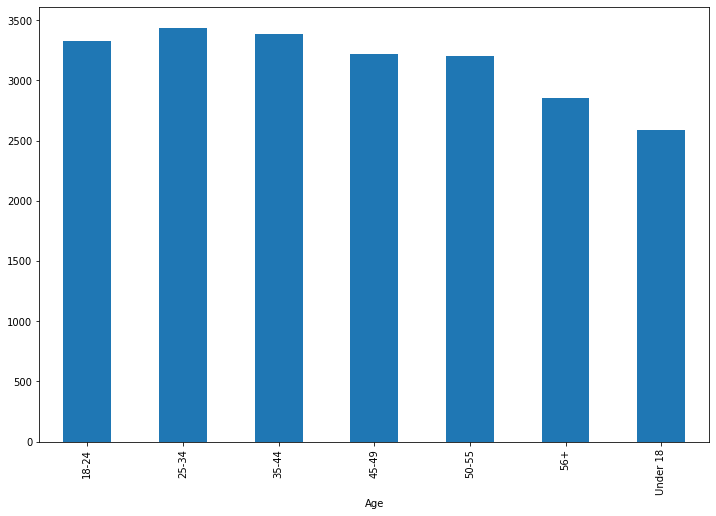

In [50]:
final_data.groupby("Age")["Title"].nunique().plot(kind="bar")

## Users belonging to which profession have watched and rated the most movies?



In [51]:
final_data.groupby("Occupation")["Title"].nunique().sort_values()

Occupation
farmer                  1422
homemaker               2160
retired                 2292
K-12 student            2404
tradesman/craftsman     2407
scientist               2469
lawyer                  2527
customer service        2586
unemployed              2628
programmer              2869
clerical/admin          2898
sales/marketing         2898
doctor/health care      2951
technician/engineer     3031
self-employed           3062
artist                  3083
academic/educator       3155
executive/managerial    3206
writer                  3267
college/grad student    3299
other                   3379
Name: Title, dtype: int64

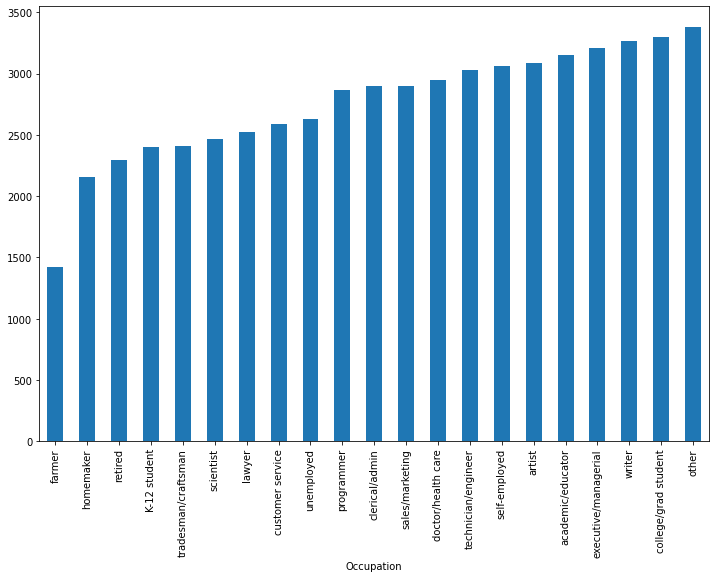

In [52]:
final_data.groupby("Occupation")["Title"].nunique().sort_values().plot(kind="bar")

## Most of the users in our dataset who’ve rated the movies are Male. (T/F)



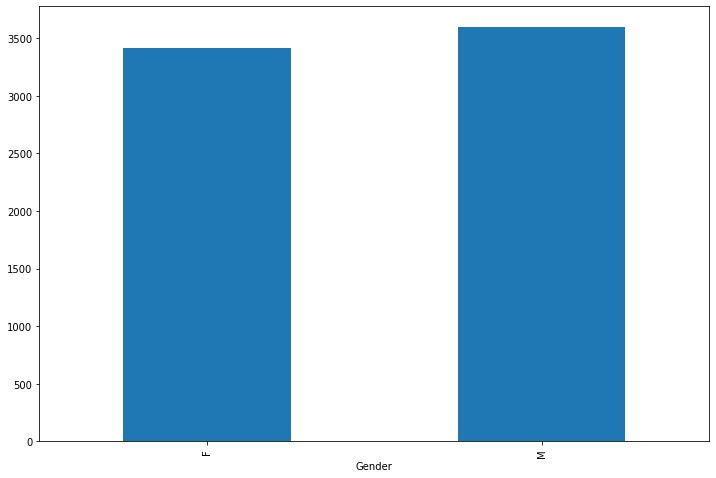

In [53]:
final_data.groupby("Gender")["Title"].nunique().sort_values().plot(kind="bar")

### number of users as per prefered watch time : 

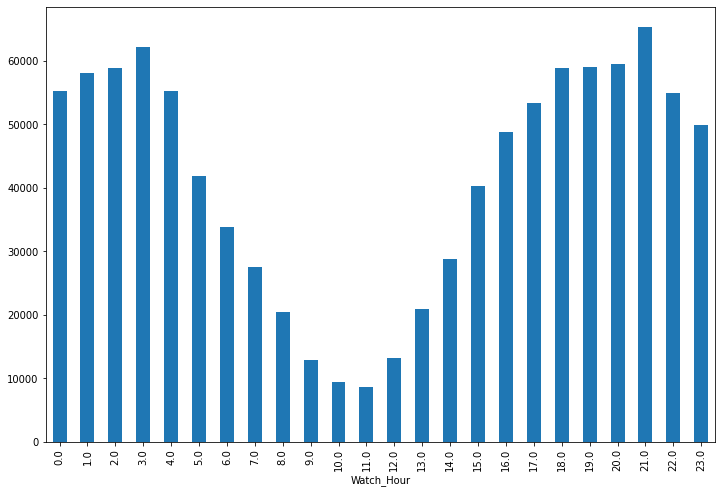

In [60]:
final_data.groupby("Watch_Hour")["UserID"].count().plot(kind="bar")

## The movie with maximum no. of ratings is ___.



In [61]:
final_data.groupby("Title")["Rating"].count().reset_index().sort_values(by="Rating",ascending=False).head(10)

,Title,Rating
125,American Beauty,3428
3092,Star Wars: Episode IV - A New Hope,2991
3093,Star Wars: Episode V - The Empire Strikes Back,2990
3094,Star Wars: Episode VI - Return of the Jedi,2883
1756,Jurassic Park,2672
2837,Saving Private Ryan,2653
3231,Terminator 2: Judgment Day,2649
2070,"Matrix, The",2590
255,Back to the Future,2583
2929,"Silence of the Lambs, The",2578


In [67]:
final_data.sample(2)

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Release_year,Rating,Watch_Hour,,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
826147,4980,M,25-34,academic/educator,55403,527,Schindler's List,1993,5,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
69505,469,M,35-44,doctor/health care,55122,3359,Breaking Away,1979,5,21.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Top 10 rated movies as per all Genres : 

In [75]:

Genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [78]:
for G in Genres:
  print(G)
  print("----------------------")
  print(final_data[final_data[G] == 1].groupby("Title")["UserID"].nunique().sort_values(ascending=False).head(10))
  print()
  print()
  print()

Action
----------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Saving Private Ryan                                2653
Terminator 2: Judgment Day                         2649
Matrix, The                                        2590
Men in Black                                       2538
Raiders of the Lost Ark                            2514
Braveheart                                         2443
Name: UserID, dtype: int64



Adventure
----------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Men in Black                                       2538
Raiders of the Lost Ark                            2514

In [88]:
m = movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")


In [90]:
m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"Horro":"Horror",
                     "Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                     "Dr":"Drama",
                     "Documenta":"Documentary",
                     "Wester":"Western",
                     "Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance",
                     "Animati":"Animation",
                     "Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                     "Roma":"Romance","A":"Adventure","Children":"Children's",
                     "Adventu":"Adventure",
                      "Adv":"Adventure",
                      "Wa":"War",
                      "Thrille"  :"Thriller"     ,
                      "Com"    :"Comedy"   ,
                      "Comed"    :"Comedy",
                      "Acti"   :"Action",
                        "Advent"   :"Adventure",
                        "Adventur"      :"Adventure",
                        "Thri":"Thriller",          
                        "Chi":"Children's",           
                        "Ro":"Romance",            
                        "F":"Fantasy",             
                        "We":"Western",            
                        "Documen":"Documentary"       ,
                        "Music":"Musical"         ,
                        "Children":"Children's" ,    
                        "Horr":"Horror"          ,
                     "Children'":"Children's",
                     "Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                     })

In [102]:
merged_data = ratings.merge(users,on="UserID",how="outer").merge(m,on="MovieID",how="outer")

In [139]:
merged_data.groupby("Genres")[["Title","UserID"]].nunique()

,Title,UserID
Genres,,
,8,1344
Action,497,6011
Adventure,281,5894
Animation,104,4794
Children's,244,5280
Comedy,1182,6031
Crime,209,5662
Documentary,124,2237
Drama,1569,6037


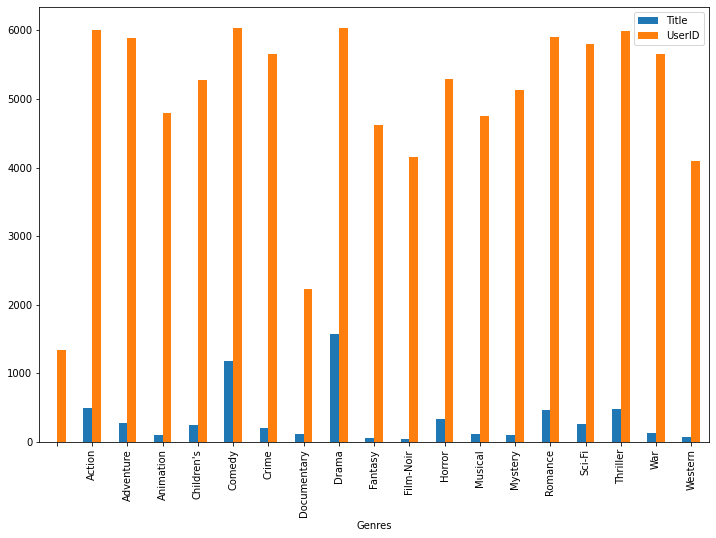

In [138]:
merged_data.groupby("Genres")[["Title","UserID"]].nunique().plot(kind="bar")

## Number of Movie TItles been raten as per Genre by each type of use Occupation : 

In [134]:
Occupation_genre_count = merged_data.groupby(["Occupation","Genres"])["Title"].nunique().sort_values(ascending=False).reset_index()


In [135]:
Occupation_genre_count.pivot(index="Occupation",columns="Genres",values="Title")

Genres,,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,,
K-12 student,5,409,234,97,229,855,135,35,852,62,30,228,94,74,313,210,349,111,43
academic/educator,6,458,262,96,231,1033,175,74,1239,62,40,282,104,94,417,241,435,129,58
artist,6,457,260,99,224,1002,176,69,1203,60,39,284,107,93,404,246,433,129,60
clerical/admin,6,440,245,98,212,969,169,56,1122,61,36,246,104,96,388,239,427,122,57
college/grad student,7,464,266,103,237,1072,185,83,1294,61,41,297,107,98,423,245,455,129,59
customer service,6,451,242,96,202,883,160,40,905,59,36,264,98,87,315,233,393,110,55
doctor/health care,7,450,253,102,228,946,165,68,1137,60,41,285,111,89,379,251,419,121,58
executive/managerial,6,466,269,101,234,1038,180,70,1243,62,40,301,106,94,416,254,438,130,62
farmer,5,322,191,81,151,519,98,8,473,44,21,113,57,43,182,181,233,70,25


In [27]:
pd.set_option("max_colwidth", None)


# Co-occurance | Frequency Based Recommender System (Apriory)

In [28]:
frame = data.groupby(["UserID","Title"])["Rating"].mean().unstack().reset_index().fillna(0).set_index('UserID')

In [30]:
frame = (frame > 0).astype(int)
frame.shape

(6040, 3633)

In [31]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets_plus = apriori(frame, min_support=0.2, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)


frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))



In [32]:

frequent_itemsets_plus.shape

(1081, 3)

In [33]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_plus, metric ="lift", min_threshold = 0.8)
rules.shape

(4610, 9)

In [43]:
rules.groupby(["antecedents"])["lift"].max().reset_index().merge(rules,on=["antecedents","lift"])

,antecedents,lift,consequents,antecedent support,consequent support,support,confidence,leverage,conviction
0,(Star Wars: Episode IV - A New Hope ),1.935315,"(Alien , Terminator 2: Judgment Day , Star Wars: Episode V - The Empire Strikes Back )",0.495199,0.214735,0.205795,0.415580,0.099458,1.343666
1,"(Matrix, The , Princess Bride, The )",1.760364,(Star Wars: Episode V - The Empire Strikes Back ),0.238245,0.495033,0.207616,0.871438,0.089677,3.927824
2,"(Saving Private Ryan , Braveheart )",1.750430,"(Matrix, The )",0.276821,0.428808,0.207781,0.750598,0.089078,2.290247
3,"(Star Wars: Episode IV - A New Hope , Sixth Sense, The )",1.714327,(Star Wars: Episode V - The Empire Strikes Back ),0.245033,0.495033,0.207947,0.848649,0.086648,3.336388
4,"(Sixth Sense, The , Star Wars: Episode V - The Empire Strikes Back )",1.717235,(Star Wars: Episode IV - A New Hope ),0.244536,0.495199,0.207947,0.850372,0.086853,3.373717
5,"(Die Hard , Star Wars: Episode V - The Empire Strikes Back )",2.108770,(Raiders of the Lost Ark ),0.235596,0.416225,0.206788,0.877723,0.108727,4.774205
6,"(Die Hard , Star Wars: Episode IV - A New Hope )",1.853327,(Star Wars: Episode V - The Empire Strikes Back ),0.226656,0.495033,0.207947,0.917458,0.095745,6.117696
7,"(E.T. the Extra-Terrestrial , Terminator 2: Judgment Day )",1.798631,(Star Wars: Episode V - The Empire Strikes Back ),0.234106,0.495033,0.208444,0.890382,0.092554,4.606601
8,"(Matrix, The , Raiders of the Lost Ark , Star Wars: Episode VI - Return of the Jedi )",1.929708,(Star Wars: Episode V - The Empire Strikes Back ),0.218377,0.495033,0.208609,0.955269,0.100505,11.289006
9,(Airplane! ),1.692648,(Back to the Future ),0.286589,0.427649,0.207450,0.723859,0.084891,2.072677


In [44]:
rules[rules["antecedents"] == rules.loc[4606]["antecedents"]].sort_values(by="lift",ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4606,(Fight Club ),(American Beauty ),0.240232,0.56755,0.2,0.832529,1.466884,0.063657,2.582245


### Item-Item Similarity Based Rec System 

## Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.



In [46]:
movies[movies["Title"].str.contains("Liar Liar")]

,MovieID,Title,Genres,Release_year
1455,1485,Liar Liar,Comedy,1997


In [47]:
m = movies[["MovieID","Title","Genres"]]

m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"Horro":"Horror",
                     "Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                     "Dr":"Drama",
                     "Documenta":"Documentary",
                     "Wester":"Western",
                     "Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance",
                     "Animati":"Animation",
                     "Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                     "Roma":"Romance","A":"Adventure","Children":"Children's",
                     "Adventu":"Adventure",
                      "Adv":"Adventure",
                      "Wa":"War",
                      "Thrille"  :"Thriller"     ,
                      "Com"        :"Comedy"   ,
                      "Comed"         :"Comedy",
                      "Acti"          :"Action",
                        "Advent"        :"Adventure",
                        "Adventur"      :"Adventure",
                        "Thri":"Thriller",          
                        "Chi":"Children's",           
                        "Ro":"Romance",            
                        "F":"Fantasy",             
                        "We":"Western",            
                        "Documen":"Documentary"       ,
                        "Music":"Musical"         ,
                        "Children":"Children's" ,    
                        "Horr":"Horror"          ,
                     "Children'":"Children's",
                     "Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                     })
m = pd.crosstab(m["MovieID"],m["Genres"])  
m = pd.DataFrame(np.where(m>=1,1,0),index = m.index,columns=m.columns)

In [48]:
def Hamming_distance(x1,x2):
  return np.sum(abs(x1-x2))

In [50]:
Ranks = []
Query = "1485"
for candidate in m.index:
  if candidate == Query:
    continue
  Ranks.append([Query,candidate,Hamming_distance(m.loc[Query],m.loc[candidate])])

In [51]:
Ranks = pd.DataFrame(Ranks,columns=["Query","Candidate","Hamming_distance"])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Query', right_on='MovieID').rename(columns={'Title': 'query_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Candidate', right_on='MovieID').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.sort_values(by=['Query', 'Hamming_distance'])



In [52]:

Ranks.head()

,Query,Candidate,Hamming_distance,query_tittle,candidate_tittle
4,1485,1001,0,Liar Liar,"Associate, The"
5,1485,1002,0,Liar Liar,Ed's Next Move
13,1485,101,0,Liar Liar,Bottle Rocket
24,1485,102,0,Liar Liar,Mr. Wrong
25,1485,1020,0,Liar Liar,Cool Runnings


# Collaborative Filtering : 

In [53]:
user_movie_ratings = ratings.pivot(index ="UserID",
              columns = "MovieID",
              values ="Rating").fillna(0)

In [54]:
user_movie_ratings.shape

(6040, 3706)

In [55]:
# 6040 users # 3706 movies 

In [56]:
ratings.shape, users.shape

((1000209, 4), (6040, 5))

In [131]:

rm_raw = ratings[['UserID', 'MovieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names


In [132]:
rm_raw.Rating = rm_raw.Rating.astype(int)
rm_raw.UserId = rm_raw.UserId.astype(int)
rm_raw.ItemId = rm_raw.ItemId.astype(int)

In [133]:
rm_raw.nunique()

UserId    6040
ItemId    3706
Rating       5
dtype: int64

In [138]:
# !pip install cmfrec


In [111]:
from cmfrec import CMF

model = CMF(k=5, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [112]:
rm_raw.shape,model.A_.shape,model.B_.shape

((1000209, 3), (6040, 5), (3706, 5))

In [113]:
model.A_.shape,model.B_.T.shape

((6040, 5), (5, 3706))

,MovieID,Title,Genres,Release_year


In [126]:
 model.topN(user=8, n=10)

array([2323,  296, 1136, 1089, 3421,  858, 1198, 3552,  260, 2776])

In [143]:
 movies_to_recommend = model.topN(user=1, n=10)
 movies_to_recommend = movies_to_recommend[movies_to_recommend<3706]
 movies_to_recommend

 movies.MovieID = movies.MovieID.astype(int)
movies.loc[movies_to_recommend]

,MovieID,Title,Genres,Release_year
1421,1446,Kolya,Comedy,1996
2099,2168,Dance with Me,Drama|Romance,1998
2776,2845,White Boys,Drama,1999
2211,2280,Clay Pigeons,Crime,1998
1022,1035,"Sound of Music, The",Musical,1965
2018,2087,Peter Pan,Animation|Children's|Fantasy|Musical,1953
1951,2020,Dangerous Liaisons,Drama|Romance,1988
1028,1041,Secrets & Lies,Drama,1996
2035,2104,Tex,Drama,1982
595,599,"Wild Bunch, The",Western,1969


In [144]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366465 sha256=a3d8dd2a966666053cdeab5b9aa99d54786198cded3c182220c579d2074fab3b
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [42]:
final_data= pd.read_csv("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /final_data.csv ")

from surprise import KNNWithMeans 
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

## The Reader class is used to parse a file containing ratings.It orders the data in format of (userid,title,rating) and even by considering the rating scale
reader = Reader(rating_scale=(0.5 , 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(final_data[["UserID","MovieID","Rating"]], reader) # loading the data as per the format

In [26]:
data

In [27]:
anti_set = data.build_full_trainset().build_anti_testset()

In [28]:
trainset, testset = train_test_split(data, test_size=.15) # Splitting the data

## User Based Collaborative Filtering :      


In [145]:
algo = KNNWithMeans(k = 50, sim_options={'name': 'cosine', 'user_based': True}) 

# K value represents the (max) number of neighbors to take into account for aggregation. Example for every item it gives 50 nearest ones.
# There are many similarity options to calculate the similarity between the neighbors. Here, we have used the cosine similarity.
# when user_based = True then it performs user based collaborative filtering

algo.fit(trainset) #fitting the train dataset

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [146]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [147]:
test_pred[0]

Prediction(uid='770', iid='2383', r_ui=1.0, est=0.8775986827947615, details={'actual_k': 50, 'was_impossible': False})

In [148]:
# get RMSE on test set
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9345


0.9344753997438834

In [149]:
accuracy.mae(test_pred, verbose=True)

MAE:  0.7433


0.7432764090468391

In [150]:
# we can query for specific predicions
uid = str(1)  # raw user id
iid = str(1)  # raw item id

In [151]:
pred = algo.predict(uid, iid, verbose=True)

user: 1          item: 1          r_ui = None   est = 4.88   {'actual_k': 50, 'was_impossible': False}


In [152]:
# anti_pre = algo.test(anti_set)
# pred_df = pd.DataFrame(anti_pre).merge(movies , left_on = ['iid'], right_on = ['MovieID'])
# pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['UserID'])

# Item Based Collaborative  Filtering : 

In [153]:
# K value represents the (max) number of neighbors to take into account for aggregation. Example for every item it gives 50 nearest ones.
# There are many similarity options to calculate the similarity between the neighbors . Here, we have used the cosine similarity.
# when user_based = False then it performs item based collaborative filtering

algo_i = KNNWithMeans(k=30, sim_options={'name': 'cosine', 'user_based': False})
algo_i.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [154]:
test_pred = algo_i.test(testset)

In [155]:
test_pred[0]

Prediction(uid='770', iid='2383', r_ui=1.0, est=1.1141077593830107, details={'actual_k': 30, 'was_impossible': False})

In [156]:
# get RMSE on test set
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.8926


0.8926413172784623

In [157]:
# we can query for specific predicions
uid = str(196)  # raw user id
iid = str(303)  # raw item id


In [158]:
pred = algo_i.predict(uid, iid, verbose=True)

user: 196        item: 303        r_ui = None   est = 2.90   {'actual_k': 29, 'was_impossible': False}


In [159]:
# final_data[final_data["MovieID"]=="984"]

In [160]:

tsr_inner_id = algo_i.trainset.to_inner_iid("1485") #Considering the movieId 1485 : Liar Liar

tsr_neighbors = algo_i.get_neighbors(tsr_inner_id, k=5) #Getting the 5 nearest neighbors for movieId 1


In [161]:

movies[movies.MovieID.isin([algo.trainset.to_raw_iid(inner_id)
                       for inner_id in tsr_neighbors])] #Displaying the 5 nearest neighbors to the Liar Liar 

,MovieID,Title,Genres,Release_year
127,129,Pie in the Sky,Comedy|Romance,1995
968,980,In the Line of Duty 2,Action,1987
1645,1692,Alien Escape,Horror|Sci-Fi,1995
2089,2158,"Henry: Portrait of a Serial Killer, Part 2",Crime|Horror,1996
2500,2569,Among Giants,Drama|Romance,1998


# Matrix Factorisation:

In [44]:
from surprise import SVD
from surprise.model_selection import cross_validate

In [30]:
svd = SVD() #Suprise library uses the SVD algorithm to perform the matrix factorisation where as other libraries uses ALS
cross_validate(svd, data, measures=['rmse','mae'], cv = 5 , return_train_measures=True,verbose=True)
##The dataset is divided into train and test and with 5 folds the rmse has been calculated

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8768  0.8736  0.8753  0.8726  0.8729  0.8742  0.0016  
MAE (testset)     0.6885  0.6858  0.6883  0.6852  0.6862  0.6868  0.0014  
RMSE (trainset)   0.6691  0.6702  0.6712  0.6692  0.6702  0.6700  0.0008  
MAE (trainset)    0.5298  0.5303  0.5310  0.5297  0.5302  0.5302  0.0005  
Fit time          13.61   14.77   14.17   14.88   14.20   14.33   0.46    
Test time         2.63    1.64    4.00    3.98    1.65    2.78    1.05    


{'test_rmse': array([0.87679055, 0.87363147, 0.87525437, 0.87256188, 0.8728605 ]),
 'train_rmse': array([0.6691445 , 0.67017315, 0.67120119, 0.6692182 , 0.67018469]),
 'test_mae': array([0.68851652, 0.68582647, 0.68829271, 0.68518788, 0.68615884]),
 'train_mae': array([0.52975006, 0.53025507, 0.53101726, 0.52965381, 0.53016147]),
 'fit_time': (13.613670587539673,
  14.765673160552979,
  14.170423984527588,
  14.876917362213135,
  14.199043035507202),
 'test_time': (2.6307239532470703,
  1.639423131942749,
  3.9973740577697754,
  3.9794485569000244,
  1.650454044342041)}

In [4]:

import pandas as pd
final_data= pd.read_csv("/content/drive/Othercomputers/My Laptop/Data Science Studies/GitHub_Desktop/BusinessCase_Data_Exploration-/Recommender System for OTT /final_data.csv ")
from surprise import Dataset

from surprise import SVD

from surprise import Reader

## The Reader class is used to parse a file containing ratings.It orders the data in format of (userid,title,rating) and even by considering the rating scale
reader = Reader(rating_scale=(0.5 , 5))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(final_data[["UserID","MovieID","Rating"]], reader) # loading the data as per the format

In [6]:
svd = SVD(n_factors =10)
trainset = data.build_full_trainset()
svd.fit(trainset) ##Fitting the trainset with the help of svd

In [7]:
svd.pu.shape , svd.qi.shape #pu gives the embeddings of Users and qi gives the embeddings of Items.

((6040, 10), (3682, 10))

In [15]:
#Storing all the movie titles in items
items = movies['Title'].unique()
##Considering the user '662' 
test = [[662, iid, 4] for iid in items]
##Finding the user predictions(ratings) for all the movies
predictions = svd.test(test)
pred = pd.DataFrame(predictions)

In [16]:
a = pred.sort_values(by='est', ascending=False) ##Sorting the values based on the estimated predictions
a[0:10] ##TOP 10

,uid,iid,r_ui,est,details
0,662,Toy Story,4,3.385119,{'was_impossible': False}
2560,662,It Came from Hollywood,4,3.385119,{'was_impossible': False}
2548,662,House of Frankenstein,4,3.385119,{'was_impossible': False}
2549,662,Frankenstein,4,3.385119,{'was_impossible': False}
2550,662,Son of Frankenstein,4,3.385119,{'was_impossible': False}
2551,662,"Ghost of Frankenstein, The",4,3.385119,{'was_impossible': False}
2552,662,Frankenstein Meets the Wolf Man,4,3.385119,{'was_impossible': False}
2553,662,"Curse of Frankenstein, The",4,3.385119,{'was_impossible': False}
2554,662,Son of Dracula,4,3.385119,{'was_impossible': False}
2555,662,"Wolf Man, The",4,3.385119,{'was_impossible': False}


In [17]:
testset = trainset.build_anti_testset()
predictions_svd = svd.test(testset) #Predicting for the test set

In [19]:
from surprise import accuracy

In [20]:
print('SVD - RMSE:', accuracy.rmse(predictions_svd, verbose=False))
print('SVD - MAE:', accuracy.mae(predictions_svd, verbose=False))

SVD - RMSE: 0.7034125702508484
SVD - MAE: 0.5440720263794291
